### **Diabetes example with Scikit-Learn**

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### **Load data**

In [82]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [83]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [84]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['disease_progression'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [85]:
# Checking the statement:
# "Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).""
df.apply(lambda x: x**2, axis='index').sum(axis='index')

age                           1.0
sex                           1.0
bmi                           1.0
bp                            1.0
s1                            1.0
s2                            1.0
s3                            1.0
s4                            1.0
s5                            1.0
s6                            1.0
disease_progression    12850921.0
dtype: float64

 #### **Exploring data**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [87]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


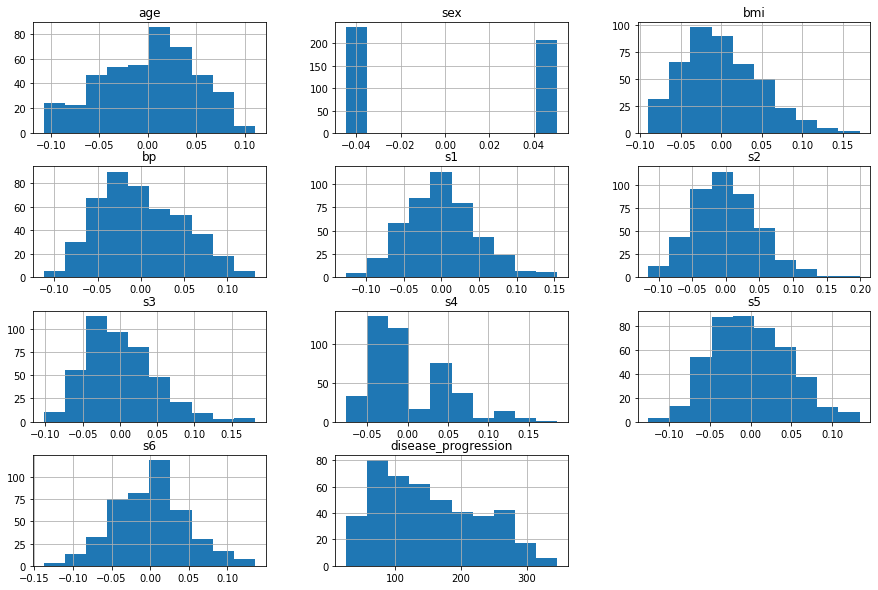

In [88]:
df.hist(figsize=(15,10))
plt.show()

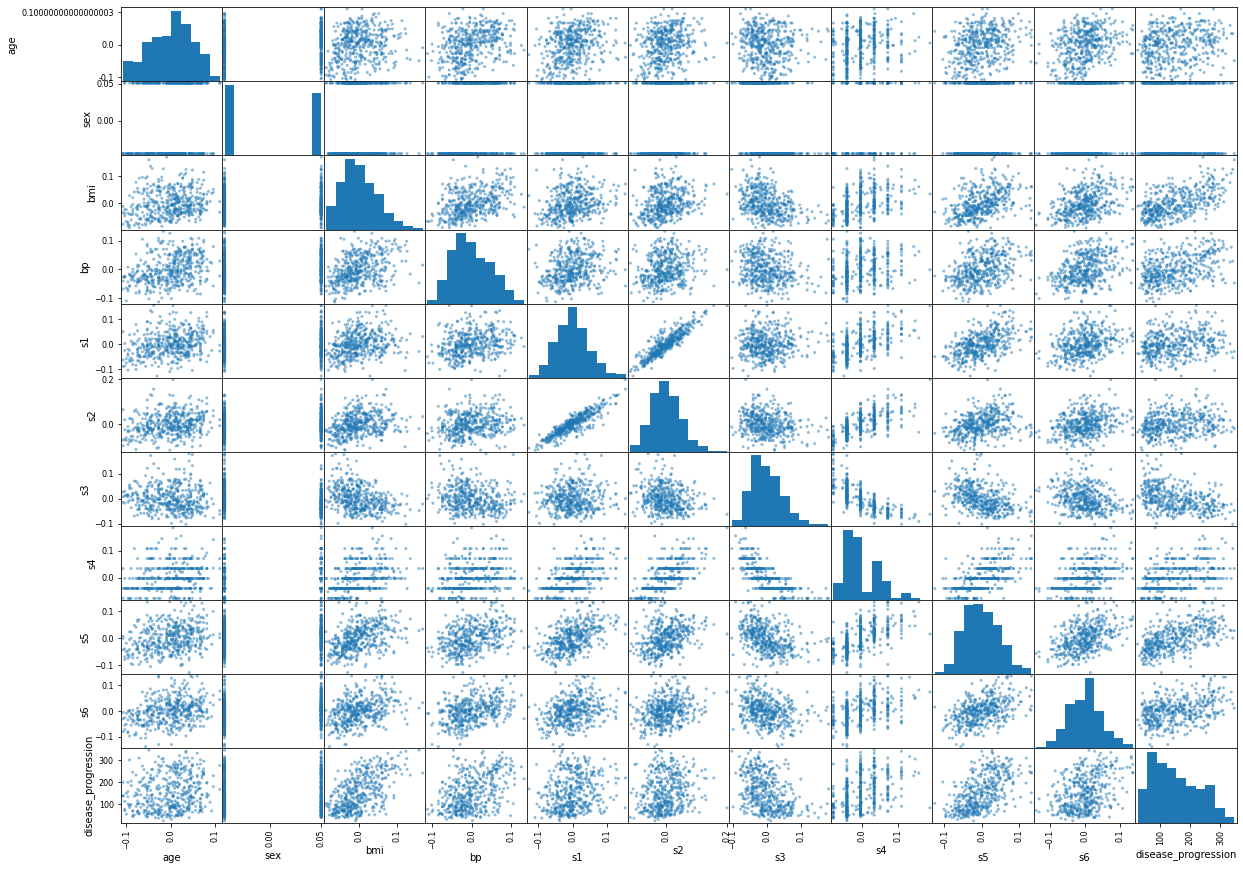

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,15))
plt.show()

#### **Simple linear regression**

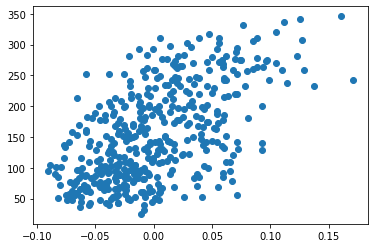

In [90]:
# Simple linear regression: we are looking for the correlation between 'bmi' and 'disease_progression'

X = df['bmi'].to_numpy().reshape(-1,1)
y = df['disease_progression'].to_numpy()

plt.scatter(X, y)

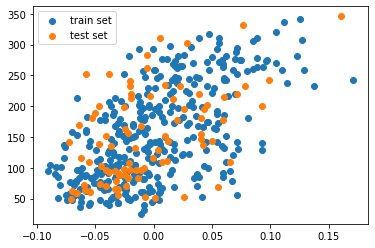

In [91]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
plt.scatter(X_train, y_train, label='train set')
plt.scatter(X_test, y_test, label='test set')
plt.legend()
plt.show()

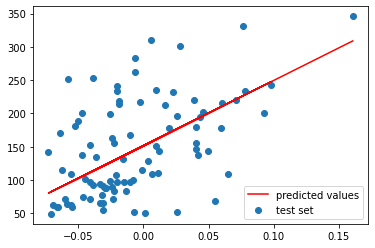

In [92]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

plt.scatter(X_test, y_test, label='test set')
plt.plot(X_test, y_pred, color='red', label='predicted values')
plt.legend()
plt.show()

In [93]:
# Calculate R^2
print("R^2: {:.2f}".format(r2_score(y_test, y_pred)))

R^2: 0.25


#### **Multiple linear regression**

In [ ]:
df

In [ ]:
df.info()

In [107]:
X = df.drop(columns=['disease_progression'])

In [108]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [109]:
# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [112]:
# Make predictions using the training set
y_pred = reg.predict(X_train)

# Calculate R^2
print("R^2: {:.2f}".format(r2_score(y_train, y_pred)))

R^2: 0.53


In [113]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)

# Calculate R^2
print("R^2: {:.2f}".format(r2_score(y_test, y_pred)))

R^2: 0.44
